In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import re

# problem statement:

take detais :1) you are marketing analyst and you have been told by chief marketing officer that recent marketing campaigns have not been as they were expected to be 2)you need to analyze the data set to understanding this problem and propose data driven solutions.

# solution

In [43]:
marketing_data =pd.read_csv("marketing_data.csv")

In [44]:
pd.set_option('display.max_columns',None)
marketing_data.head()
import warnings
warnings.filterwarnings('ignore')

In [45]:
marketing_data.head(2)

id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0  1826       1970  Graduation      Divorced  $84,835.00         0         0   
1     1       1961  Graduation        Single  $57,091.00         0         0   

  DtCustomer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    6/16/14        0       189        104              379              111   
1    6/15/14        0       464          5               64                7   

   MntSweetProducts  MntGoldProducts  NumDealsPurchases  NumWebPurchases  \
0               189              218                  1                4   
1                 0               37                  1                7   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   

  Country  
0      SP  
1      CA

In [46]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [47]:
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [48]:
marketing_data.describe()

id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProducts  NumDealsPurchases  NumWebPurchases  \
count       2240.000000      2240.000000        2240.000000      2240.000000   
mean          27.062946        44.021875           2.325000         4.084821   
std           41.280498        52.167439           1.932238         2.778714   
min            0.000000         0.000000           0.000000         0.000000   
25%            1.000000         9.000000           1.000000         2.000000   
50%            8.000000        24.000000           2.000000         4.000000   
75%           33.000000        56.000000           3.000000         6.000000   
max          263.000000       362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2240.000000        2240.000000        2240.000000   
mean              2.662054           5.790179           5.316518   
std               2.923101           3.250958           2.426645   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.013393   
std        0.259813      0.262728      0.259813      0.245316      0.114976   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Response     Complain  
count  2240.000000  2240.000000  
mean      0.149107     0.009375  
std       0.356274     0.096391  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

In [49]:
marketing_data["Income"].describe()

count           2216
unique          1974
top       $7,500.00 
freq              12
Name: Income, dtype: object

In [50]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

# cleaning data

In [51]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [52]:
marketing_data["Income"]=marketing_data["Income"].replace("[\$,]","",regex=True).astype(float)
marketing_data["Income"].describe()
marketing_data.columns=[re.sub(r"(?<!^)(?=[A-Z])","_",x).lower()for x in marketing_data.columns]
marketing_data

id  year_birth   education marital_status   income  kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      teenhome dt_customer  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0            0     6/16/14        0        189         104                379   
1            0     6/15/14        0        464           5                 64   
2            1     5/13/14        0        134          11                 59   
3            1     5/11/14        0         10           0                  1   
4            0      4/8/14        0          6          16                 24   
...        ...         ...      ...        ...         ...                ...   
2235         1      3/7/13       99        372          18                126   
2236         0     1/22/13       99          5          10                 13   
2237         0     12/3/12       99        185           2                 88   
2238         0    11/29/12       99        267          38                701   
2239         2      9/1/12       99        169          24                553   

      mnt_fish_products  mnt_sweet_products  mnt_gold_products  \
0                   111                 189                218   
1                     7                   0                 37   
2                    15                   2                 30   
3                     0                   0                  0   
4                    11                   0                 34   
...                 ...                 ...                ...   
2235                 47                  48                 78   
2236                  3                   8                 16   
2237                 15                   5                 14   
2238                149                 165                 63   
2239                188                   0                144   

      num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                       1                  4                      4   
1                       1                  7                      3   
2                       1                  3                      2   
3                       1                  1                      0   
4                       2                  3                      1   
...                   ...                ...                    ...   
2235                    2                  5                      2   
2236                    1                  1                      0   
2237                    2                  6                      1   
2238                    1                  5                      4   
2239                    1                  8                      5   

      num_store_purchases  num_web_visits_month  accepted_cmp3  accepted_cmp4  \
0                       6                     1              0              0   
1                       7                     5              0              0   
2                       5                     2              0              0   
3                       2                     7              0              0   
4                       2                     7              1              0   
...                   ...              

<IPython.core.display.Javascript object>


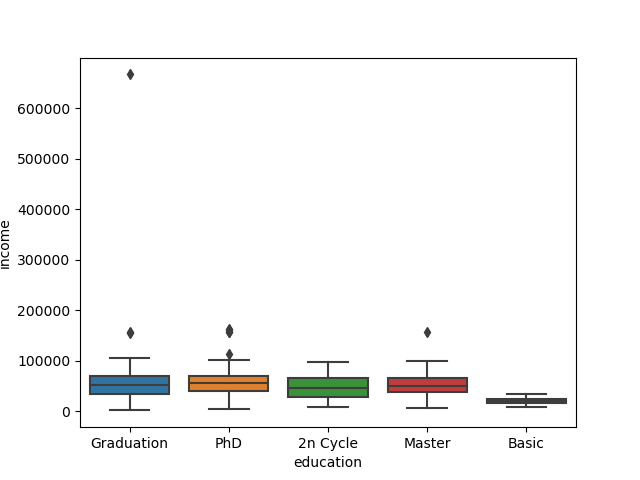

In [53]:
plt.figure()
sns.boxplot(x=marketing_data["education"],y=marketing_data["income"])
plt.show()

this boxplot shows amajor outlier on the right so it is removed from data base

<IPython.core.display.Javascript object>


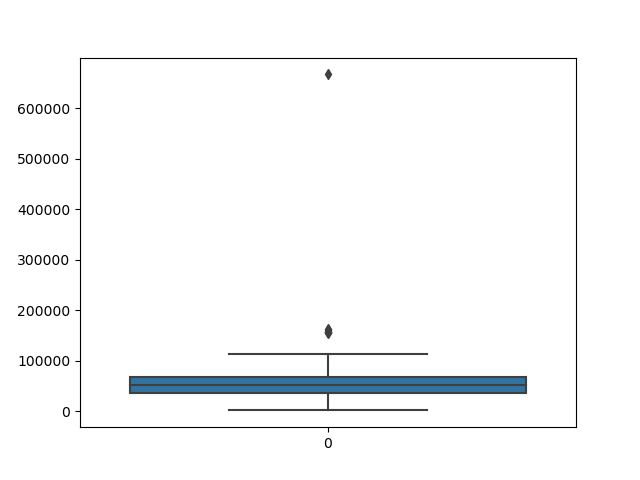

In [54]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()

In [69]:
marketing_data["income"].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [56]:
marketing_data=marketing_data[marketing_data["income"]<300000]
marketing_data


id  year_birth   education marital_status   income  kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      teenhome dt_customer  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0            0     6/16/14        0        189         104                379   
1            0     6/15/14        0        464           5                 64   
2            1     5/13/14        0        134          11                 59   
3            1     5/11/14        0         10           0                  1   
4            0      4/8/14        0          6          16                 24   
...        ...         ...      ...        ...         ...                ...   
2235         1      3/7/13       99        372          18                126   
2236         0     1/22/13       99          5          10                 13   
2237         0     12/3/12       99        185           2                 88   
2238         0    11/29/12       99        267          38                701   
2239         2      9/1/12       99        169          24                553   

      mnt_fish_products  mnt_sweet_products  mnt_gold_products  \
0                   111                 189                218   
1                     7                   0                 37   
2                    15                   2                 30   
3                     0                   0                  0   
4                    11                   0                 34   
...                 ...                 ...                ...   
2235                 47                  48                 78   
2236                  3                   8                 16   
2237                 15                   5                 14   
2238                149                 165                 63   
2239                188                   0                144   

      num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                       1                  4                      4   
1                       1                  7                      3   
2                       1                  3                      2   
3                       1                  1                      0   
4                       2                  3                      1   
...                   ...                ...                    ...   
2235                    2                  5                      2   
2236                    1                  1                      0   
2237                    2                  6                      1   
2238                    1                  5                      4   
2239                    1                  8                      5   

      num_store_purchases  num_web_visits_month  accepted_cmp3  accepted_cmp4  \
0                       6                     1              0              0   
1                       7                     5              0              0   
2                       5                     2              0              0   
3                       2                     7              0              0   
4                       2                     7              1              0   
...                   ...              

<IPython.core.display.Javascript object>


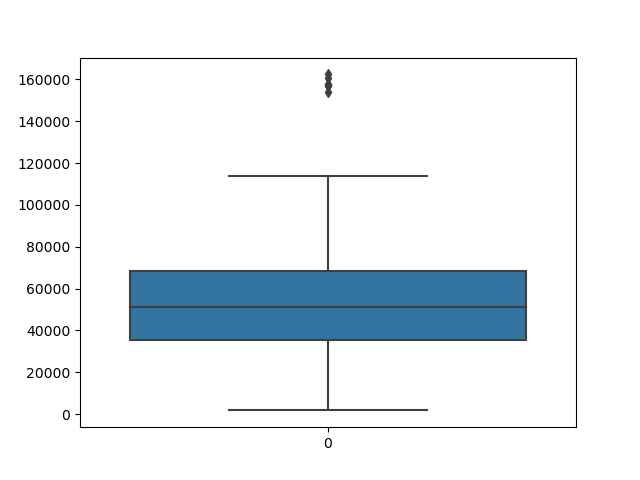

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [57]:
plt.figure()
sns.boxplot(marketing_data["income"])
plt.show()
marketing_data["income"].describe()

In [58]:
marketing_data['income']=marketing_data['income'].fillna(marketing_data['income'].mean())

# adding an age column

In [59]:
marketing_data['age']=2023-marketing_data['year_birth']
marketing_data["age"]

0       53
1       62
2       65
3       56
4       34
        ..
2235    47
2236    46
2237    47
2238    45
2239    54
Name: age, Length: 2215, dtype: int64

<IPython.core.display.Javascript object>


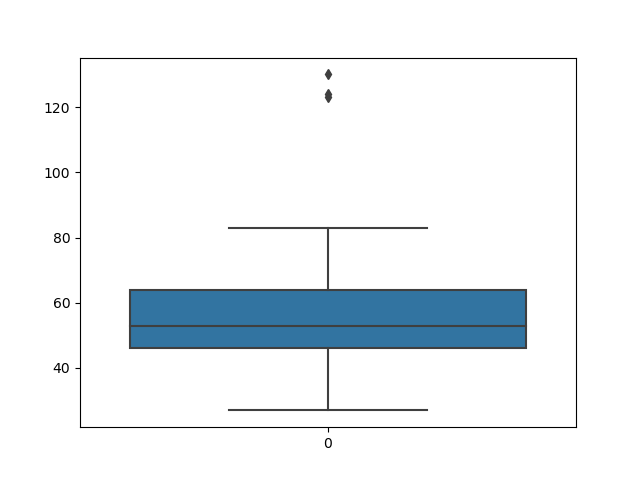

count    2215.000000
mean       54.183296
std        11.987000
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: age, dtype: float64

In [60]:
plt.figure()
sns.boxplot(marketing_data["age"])
plt.show()
marketing_data["age"].describe()

<IPython.core.display.Javascript object>


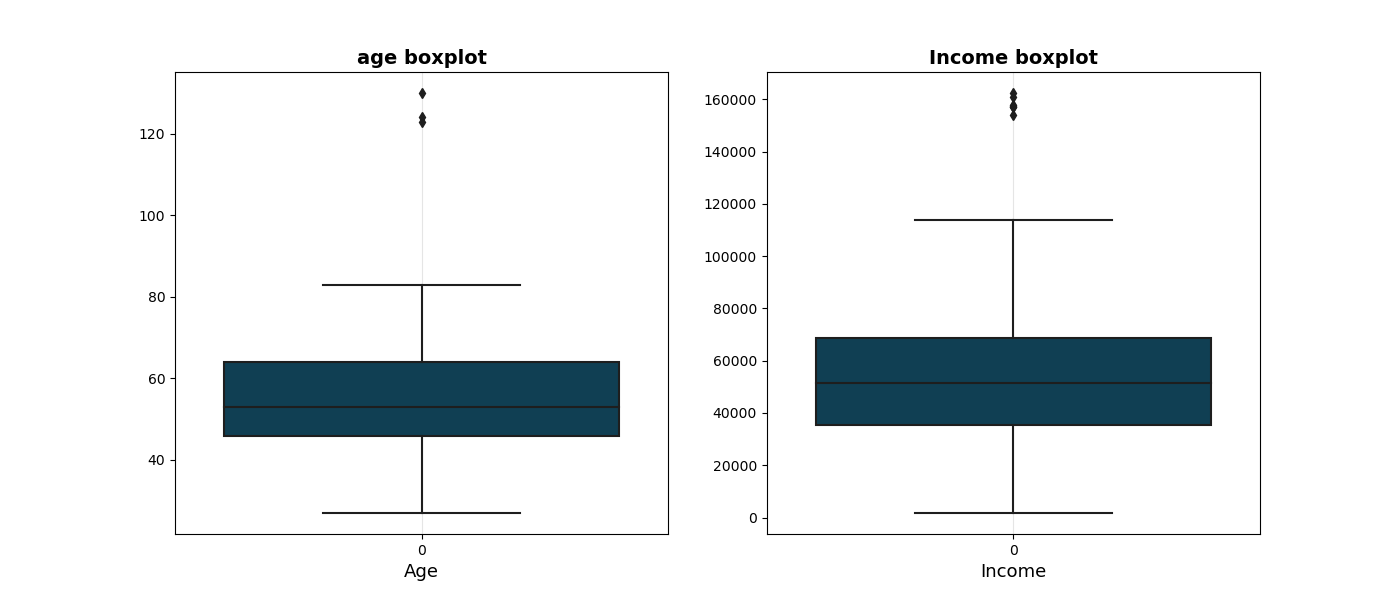

Text(0.5, 0, 'Income')

In [70]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
colors=['#05445E','#89AB4','#75E6DA','#9DAFBO','4D7O7E','#56B66B']
sns.boxplot(marketing_data["age"],ax=ax[0],palette=colors)
ax[0].xaxis.grid(alpha=0.33)
ax[0].set_axisbelow(True)
ax[0].set_title("age boxplot",fontsize=14,fontweight='bold')
ax[0].set_xlabel('Age',fontsize=13)
sns.boxplot(marketing_data['income'],ax=ax[1],palette=colors)
ax[1].xaxis.grid(alpha=0.33)
ax[1].set_axisbelow(True)
ax[1].set_title("Income boxplot",fontsize=14,fontweight='bold')
ax[1].set_xlabel('Income',fontsize=13)

# checking the education variable

<IPython.core.display.Javascript object>


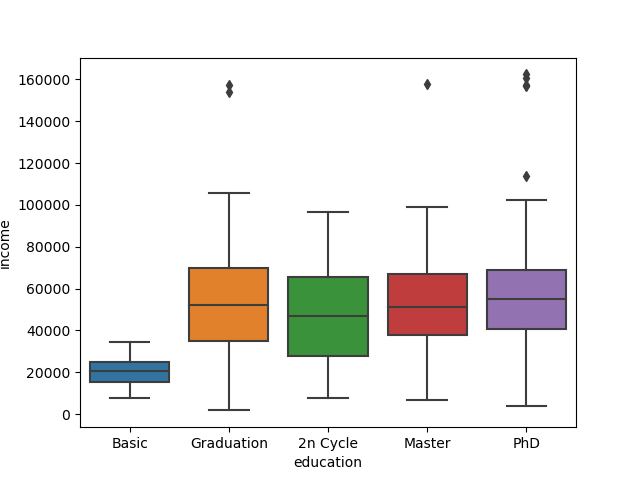

In [62]:
plt.figure()
sns.boxplot(x=marketing_data["education"],y=marketing_data["income"],
            order=["Basic","Graduation","2n Cycle","Master","PhD"])
plt.show()

<IPython.core.display.Javascript object>


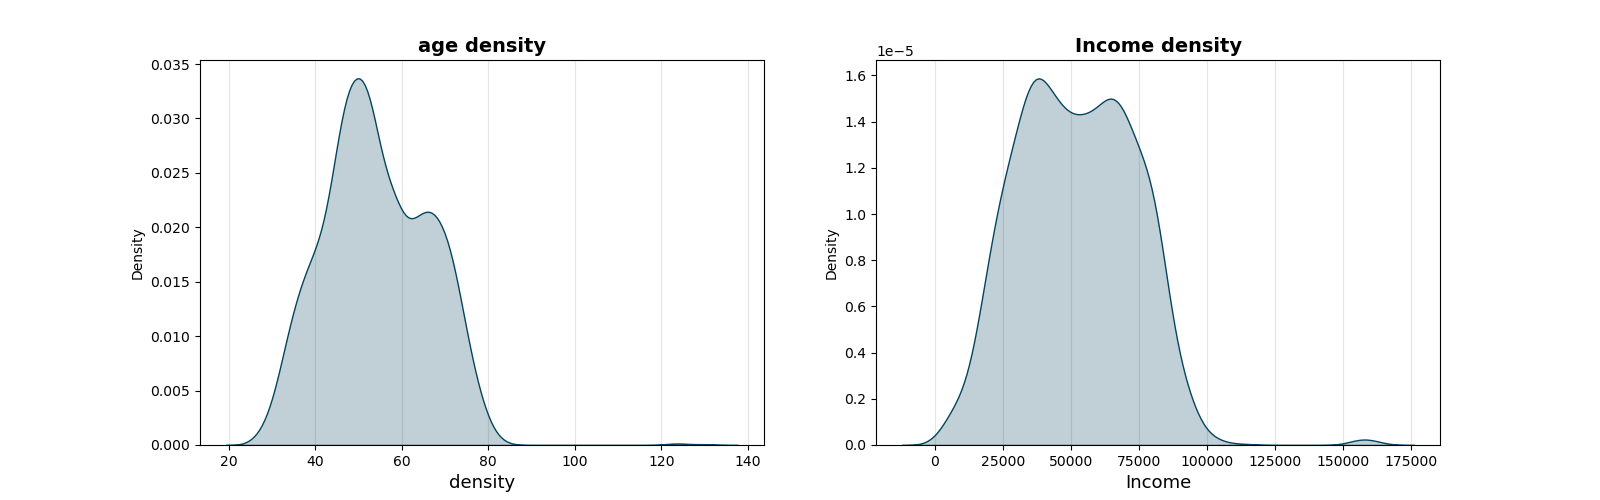

Text(0.5, 0, 'Income')

In [63]:
fig1,ax= plt.subplots(1,2,figsize=(16,5))
sns.kdeplot(marketing_data["age"],ax=ax[0],shade=True,color=colors[0])
ax[0].xaxis.grid(alpha=0.33)
ax[0].set_axisbelow(True)
ax[0].set_title("age density",fontweight='bold',fontsize=14)
ax[0].set_xlabel('density',fontsize=13)
sns.kdeplot(marketing_data['income'],ax=ax[1],shade=True,color=colors[0])
ax[1].xaxis.grid(alpha=0.33)
ax[1].set_axisbelow(True)
ax[1].set_title("Income density",fontsize=14,fontweight='bold')
ax[1].set_xlabel('Income',fontsize=13)


# exploratory data analysis

<IPython.core.display.Javascript object>


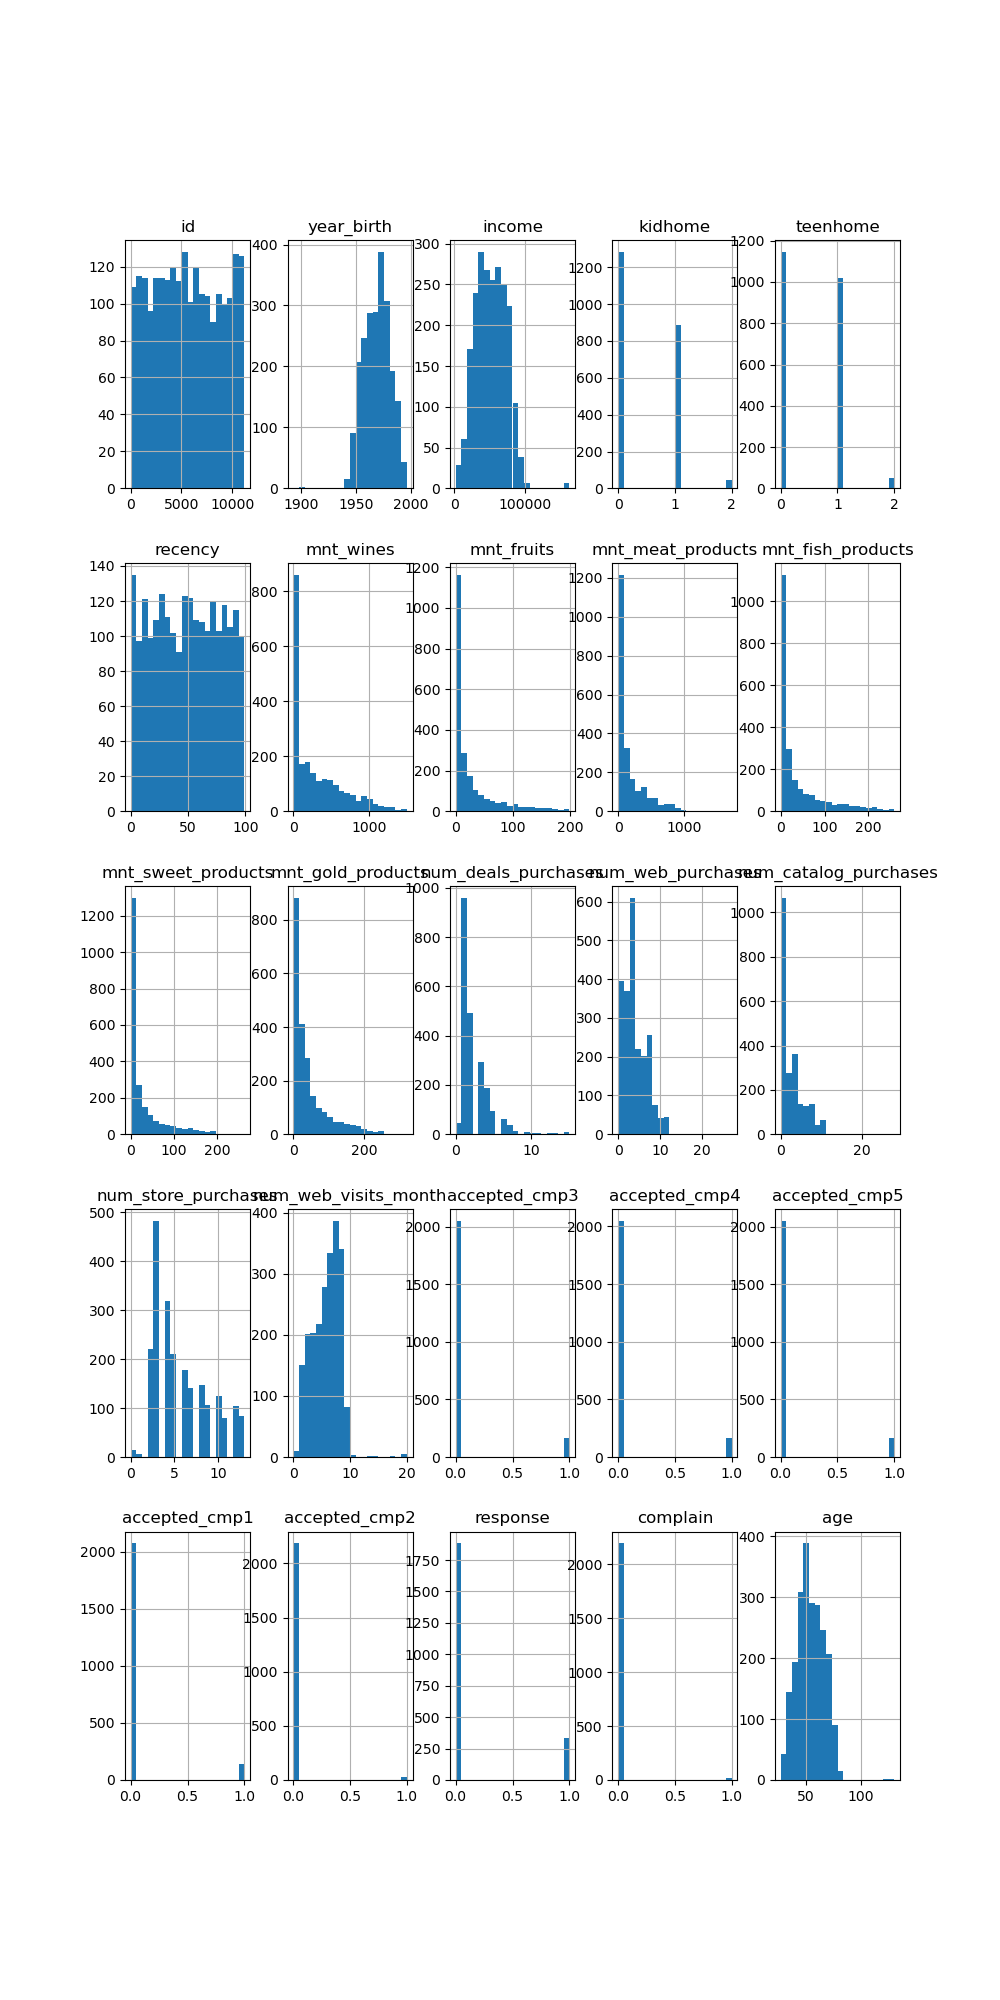

In [64]:
fig=plt.figure(figsize=(10,20))
ax=fig.gca()
marketing_data.hist(ax=ax,bins=20);

In [71]:
marketing_data.corr()

id  year_birth    income   kidhome  teenhome  \
id                     1.000000    0.001991  0.000064  0.001181 -0.002535   
year_birth             0.001991    1.000000 -0.198064  0.233376 -0.350609   
income                 0.000064   -0.198064  1.000000 -0.514935  0.034363   
kidhome                0.001181    0.233376 -0.514935  1.000000 -0.039450   
teenhome              -0.002535   -0.350609  0.034363 -0.039450  1.000000   
recency               -0.043918   -0.016023  0.006945  0.011919  0.013466   
mnt_wines             -0.020625   -0.159225  0.688269 -0.497132  0.003380   
mnt_fruits             0.007495   -0.017653  0.507959 -0.373350 -0.176726   
mnt_meat_products     -0.005550   -0.033499  0.692465 -0.439100 -0.261478   
mnt_fish_products     -0.023712   -0.040265  0.520351 -0.388751 -0.205523   
mnt_sweet_products    -0.005600   -0.020013  0.523746 -0.377855 -0.163368   
mnt_gold_products     -0.010847   -0.064030  0.389204 -0.354857 -0.020152   
num_deals_purchases   -0.041097   -0.058953 -0.108457  0.216594  0.386754   
num_web_purchases     -0.018271   -0.152951  0.458812 -0.371895  0.161948   
num_catalog_purchases -0.001970   -0.121610  0.696541 -0.504393 -0.112962   
num_store_purchases   -0.012615   -0.127660  0.630397 -0.501151  0.049393   
num_web_visits_month  -0.007946    0.123833 -0.650564  0.447462  0.131386   
accepted_cmp3         -0.035751    0.061878 -0.015286  0.016203 -0.042649   
accepted_cmp4         -0.023790   -0.066030  0.219337 -0.161936  0.038265   
accepted_cmp5         -0.006917    0.010663  0.396571 -0.205227 -0.190950   
accepted_cmp1         -0.018085   -0.009531  0.327167 -0.174085 -0.144996   
accepted_cmp2         -0.014936   -0.006682  0.103909 -0.081833 -0.015573   
response              -0.021273    0.023825  0.161049 -0.077733 -0.154114   
complain               0.034217   -0.030380 -0.030583  0.041034  0.003267   
age                   -0.001991   -1.000000  0.198064 -0.233376  0.350609   

                        recency  mnt_wines  mnt_fruits  mnt_meat_products  \
id                    -0.043918  -0.020625    0.007495          -0.005550   
year_birth            -0.016023  -0.159225   -0.017653          -0.033499   
income                 0.006945   0.688269    0.507959           0.692465   
kidhome                0.011919  -0.497132   -0.373350          -0.439100   
teenhome               0.013466   0.003380   -0.176726          -0.261478   
recency                1.000000   0.015370   -0.005971           0.022254   
mnt_wines              0.015370   1.000000    0.386977           0.568752   
mnt_fruits            -0.005971   0.386977    1.000000           0.547796   
mnt_meat_products      0.022254   0.568752    0.547796           1.000000   
mnt_fish_products      0.000331   0.397602    0.593407           0.573507   
mnt_sweet_products     0.024859   0.390178    0.571581           0.535048   
mnt_gold_products      0.017417   0.392588    0.396443           0.359328   
num_deals_purchases    0.002470   0.009235   -0.134416          -0.121079   
num_web_purchases     -0.005803   0.553745    0.302001           0.307013   
num_catalog_purchases  0.023856   0.634684    0.486229           0.734082   
num_store_purchases   -0.000784   0.639889    0.458457           0.485877   
num_web_visits_month  -0.018453  -0.321928   -0.418706          -0.539464   
accepted_cmp3         -0.032378   0.061363    0.014385           0.018356   
accepted_cmp4          0.017455   0.373103    0.006356           0.091544   
accepted_cmp5         -0.000596   0.473530    0.212840           0.376827   
accepted_cmp1         -0.021172   0.351380    0.191786           0.313034   
accepted_cmp2         -0.001448   0.206175   -0.009997           0.043491   
response              -0.199981   0.246185    0.122391           0.237653   
complain               0.013599  -0.039516   -0.005338          -0.023814   
age                    0.016023   0.159225    0.017653           0.033499   

                       

<IPython.core.display.Javascript object>


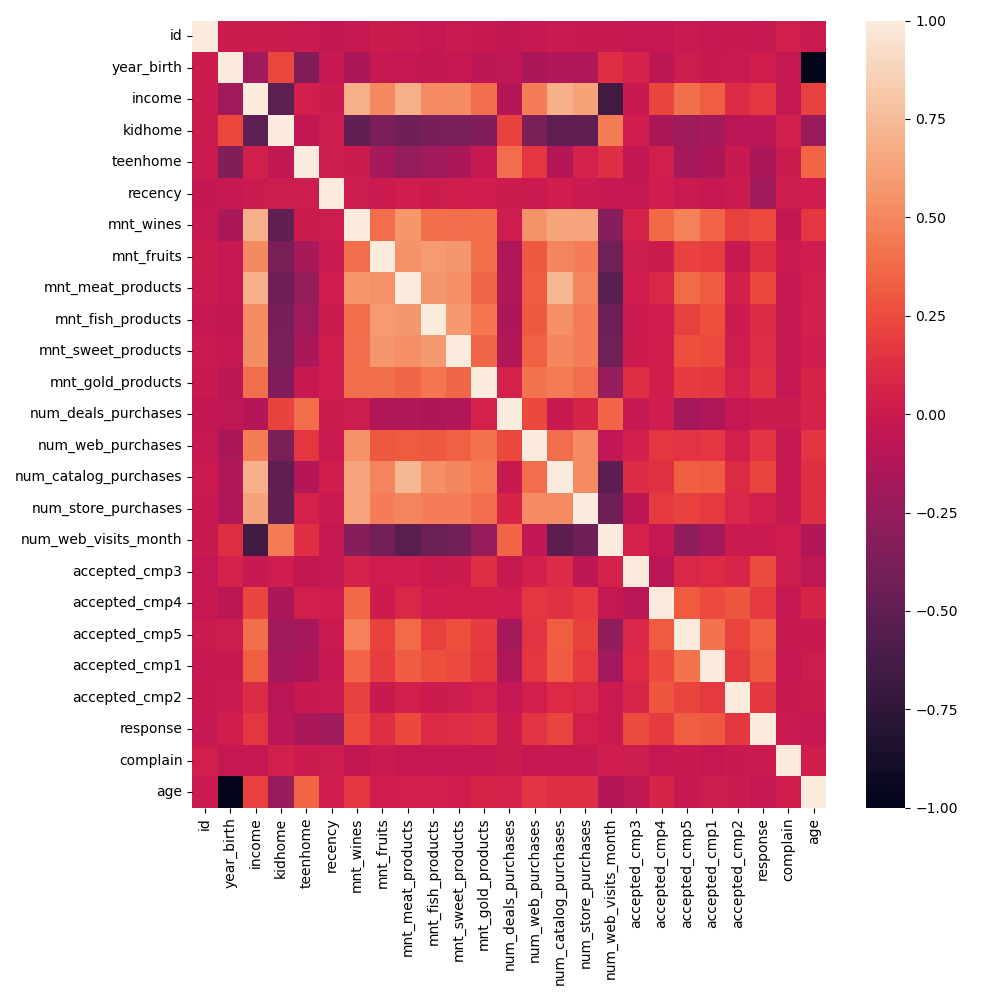

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(data=marketing_data.corr(),annot=False)
plt.tight_layout()
plt.show()

# purchasing behavior by income

In [73]:
num_purchses_cols=["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]

In [74]:
num_purchses_cols

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [75]:

num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0
fig = plt.figure(figsize=(8,8)
for i in range(len(num_purchases_cols)): # 4
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.scatterplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], 
                    hue=marketing_data["education"], palette="viridis")
    plt.title("Purchase Behavior by income")

plt.tight_layout()
plt.show()


SyntaxError: '(' was never closed (2444469168.py, line 4)

<IPython.core.display.Javascript object>


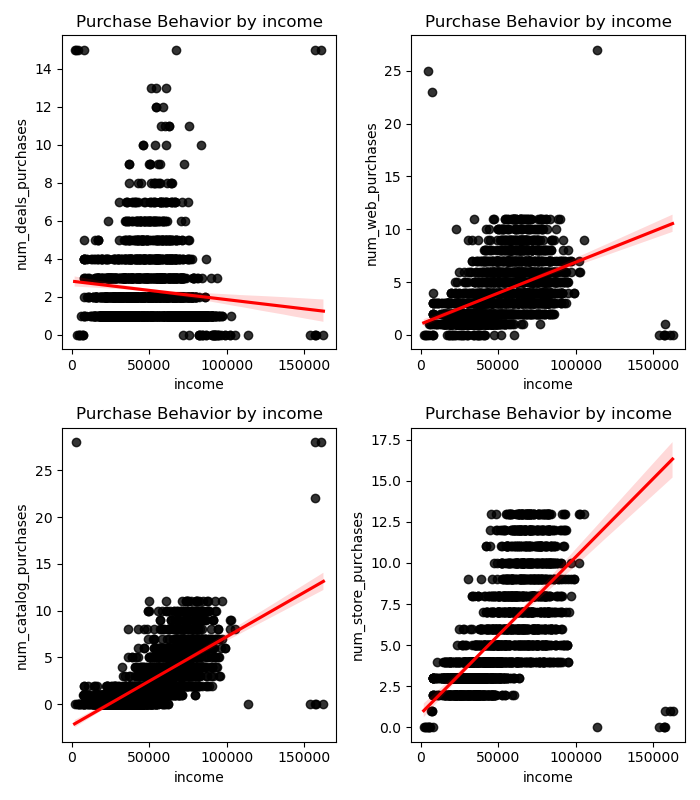

In [76]:

num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
fig = plt.figure(figsize=(7,8))
plot = 0
for i in range(len(num_purchases_cols)):
    plot += 1
    ax = plt.subplot(2, 2, plot)

    sns.regplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], 
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

In [77]:
# add new total_purchases column to marketing_data
marketing_data["total_purchases"] = marketing_data["num_deals_purchases"]+marketing_data["num_catalog_purchases"] + marketing_data["num_web_purchases"] + marketing_data["num_store_purchases"]

<IPython.core.display.Javascript object>


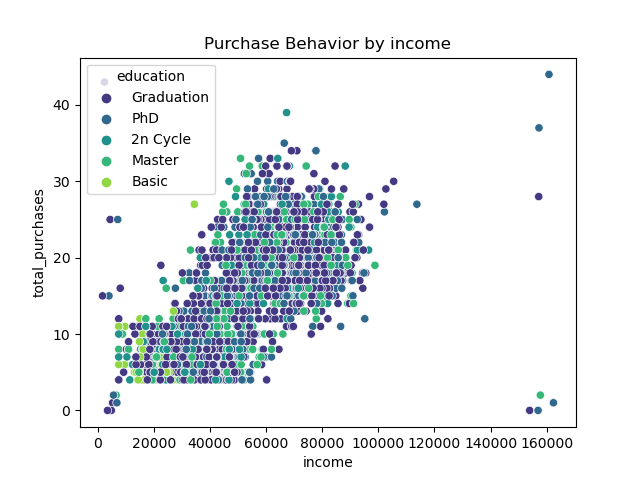

In [78]:
plt.figure()
# scatterplot of total_purchases vs. income
sns.scatterplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
                hue=marketing_data['education'], palette="viridis")
plt.title("Purchase Behavior by income")
plt.show()

<IPython.core.display.Javascript object>


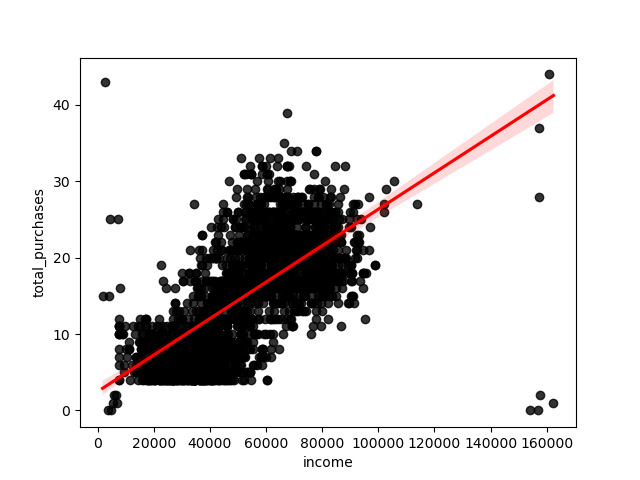

In [79]:
plt.figure()
# regression plot of total_purchases vs income
sns.regplot(y=marketing_data["total_purchases"], x=marketing_data["income"], 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

<IPython.core.display.Javascript object>


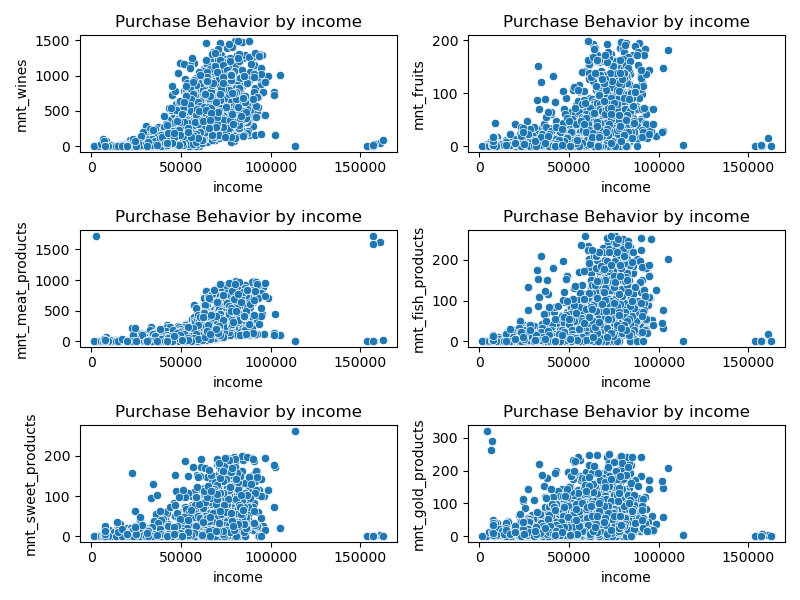

In [80]:
# amounts of items list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(8,6))
# for loop to go through length of amounts list
for i in range(len(amounts_list)):
    plot += 1
    # set up subplots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of amount of items bought vs. income
    sns.scatterplot(y= marketing_data[amounts_list[i]], x=marketing_data["income"])
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


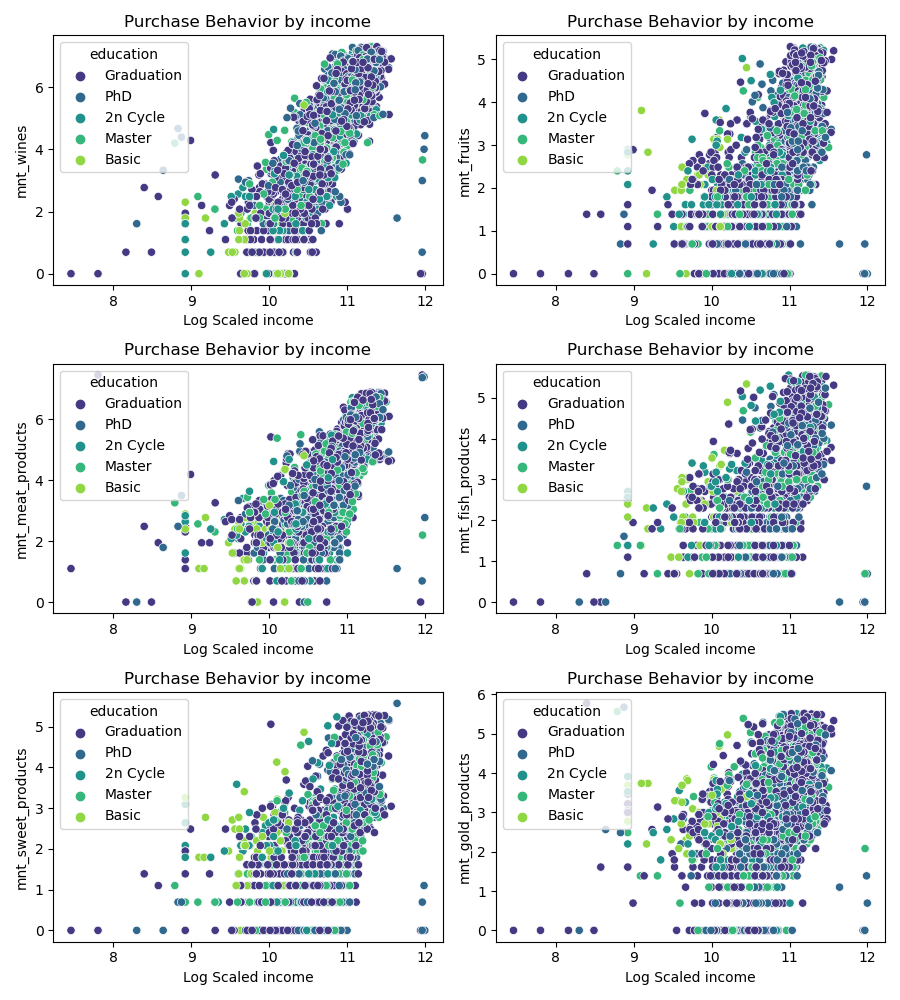

In [81]:
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
axes = [None for column in amounts_list]
plot = 0
fig = plt.figure(figsize=(9,10))
for i in range(len(amounts_list)):
    plot += 1
    ax = plt.subplot(3, 2, plot)
    sns.scatterplot(y=np.log(marketing_data[amounts_list[i]]), x=np.log(marketing_data["income"]), 
                    hue=marketing_data["education"], palette="viridis")
    ax.set_xlabel("Log Scaled income")
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


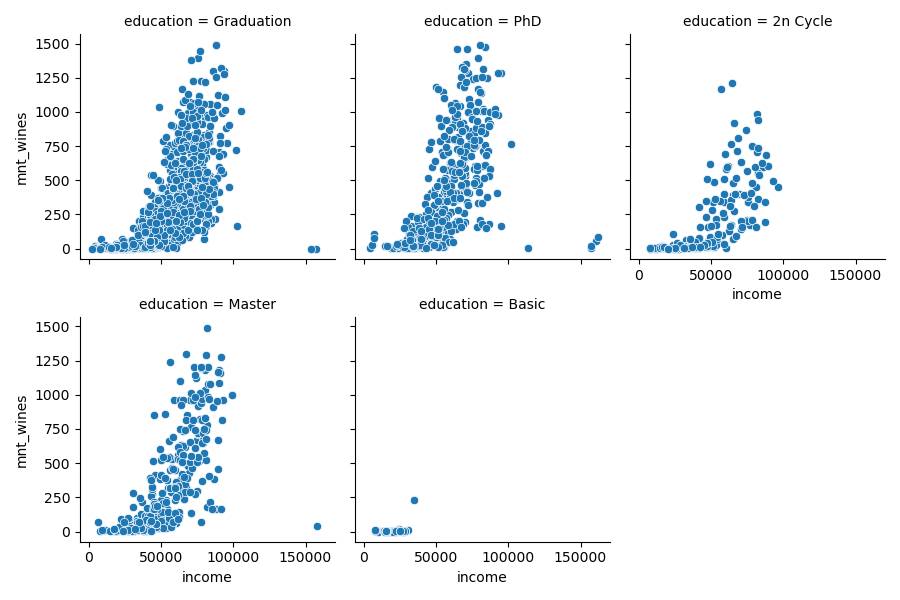

<IPython.core.display.Javascript object>


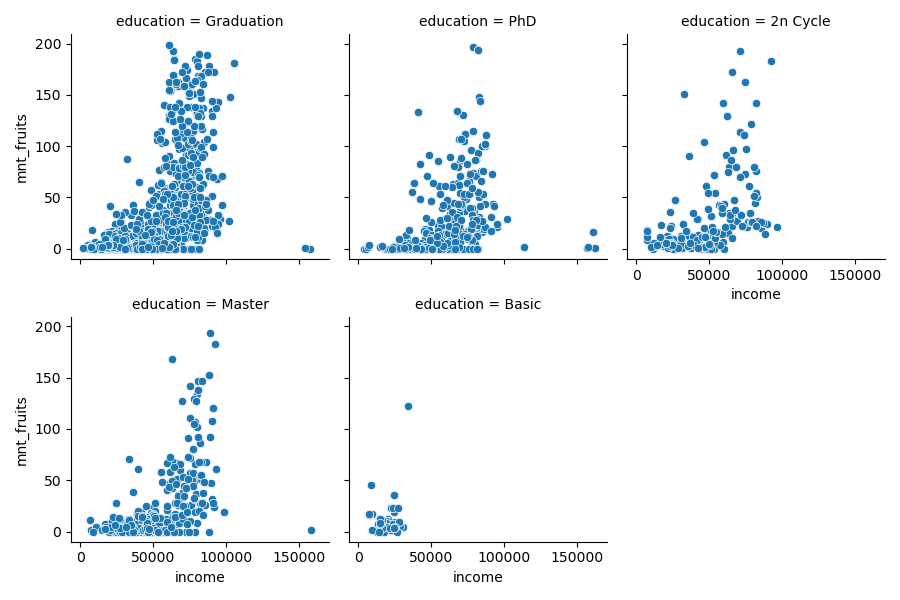

<IPython.core.display.Javascript object>


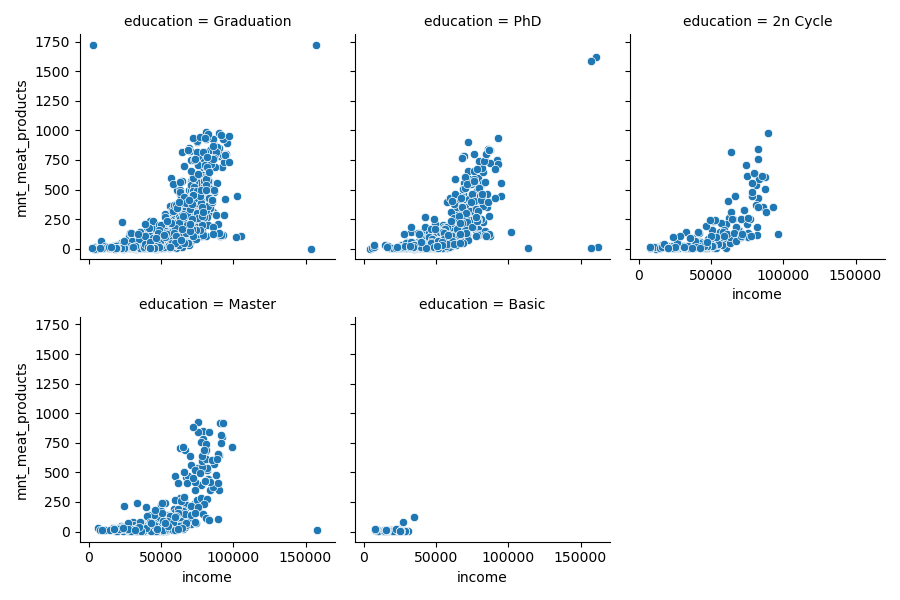

<IPython.core.display.Javascript object>


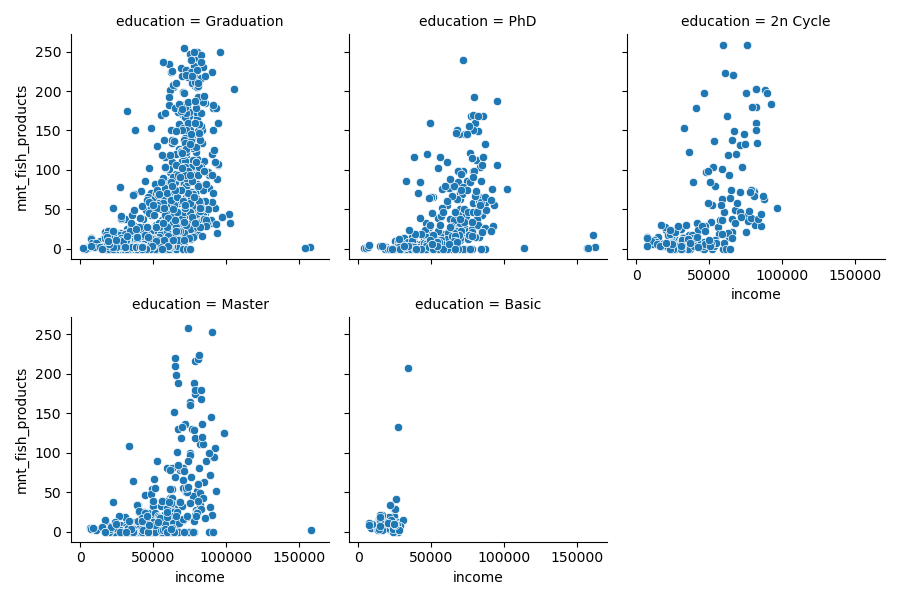

<IPython.core.display.Javascript object>


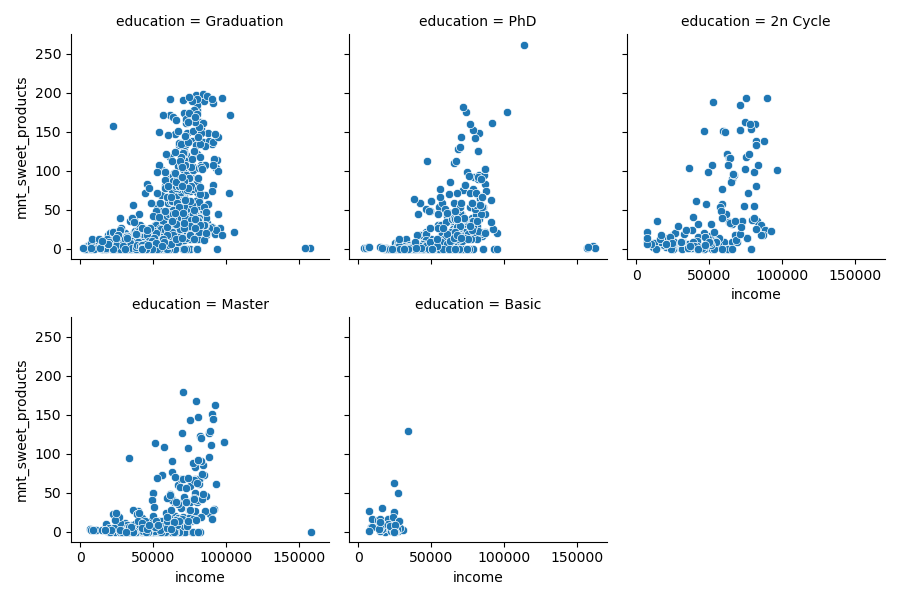

<IPython.core.display.Javascript object>


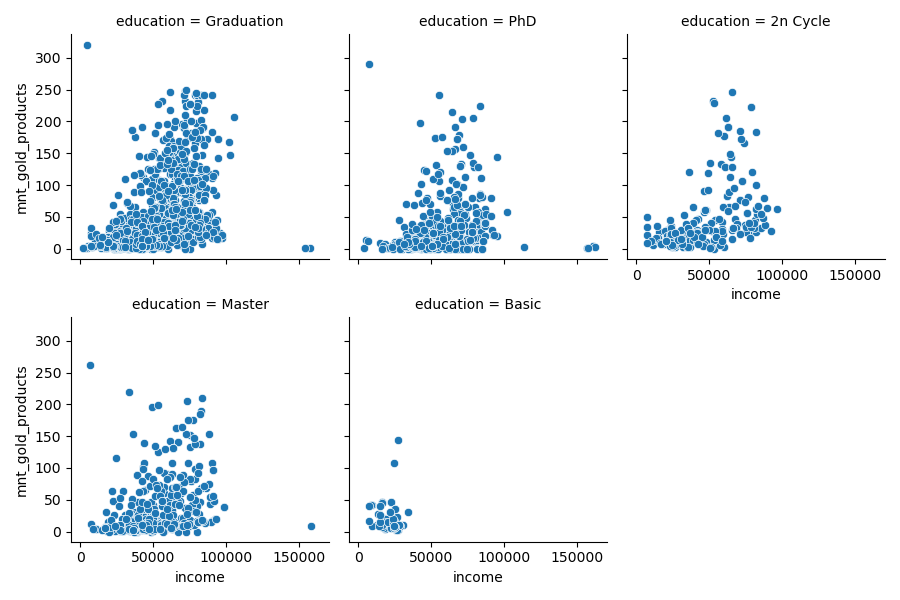

In [82]:
variable_names = {}
#amounts columns list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income", amounts_list[i])
plt.show()

<IPython.core.display.Javascript object>


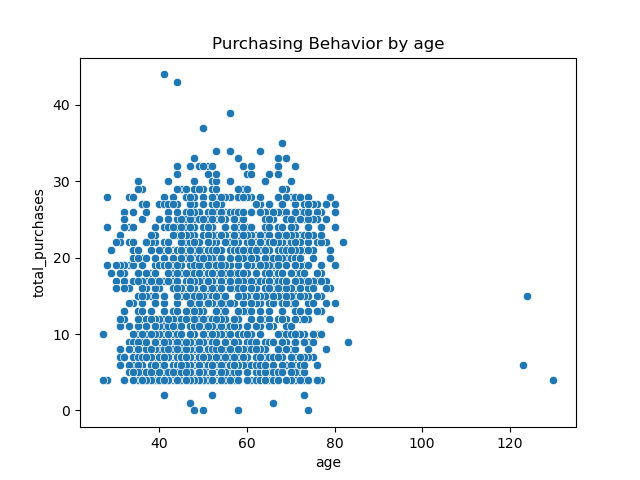

In [83]:
plt.figure()
# scatterplot of total purchases vs. age
sns.scatterplot(x=marketing_data["age"], y=marketing_data["total_purchases"])
plt.title("Purchasing Behavior by age")
plt.show()

<IPython.core.display.Javascript object>


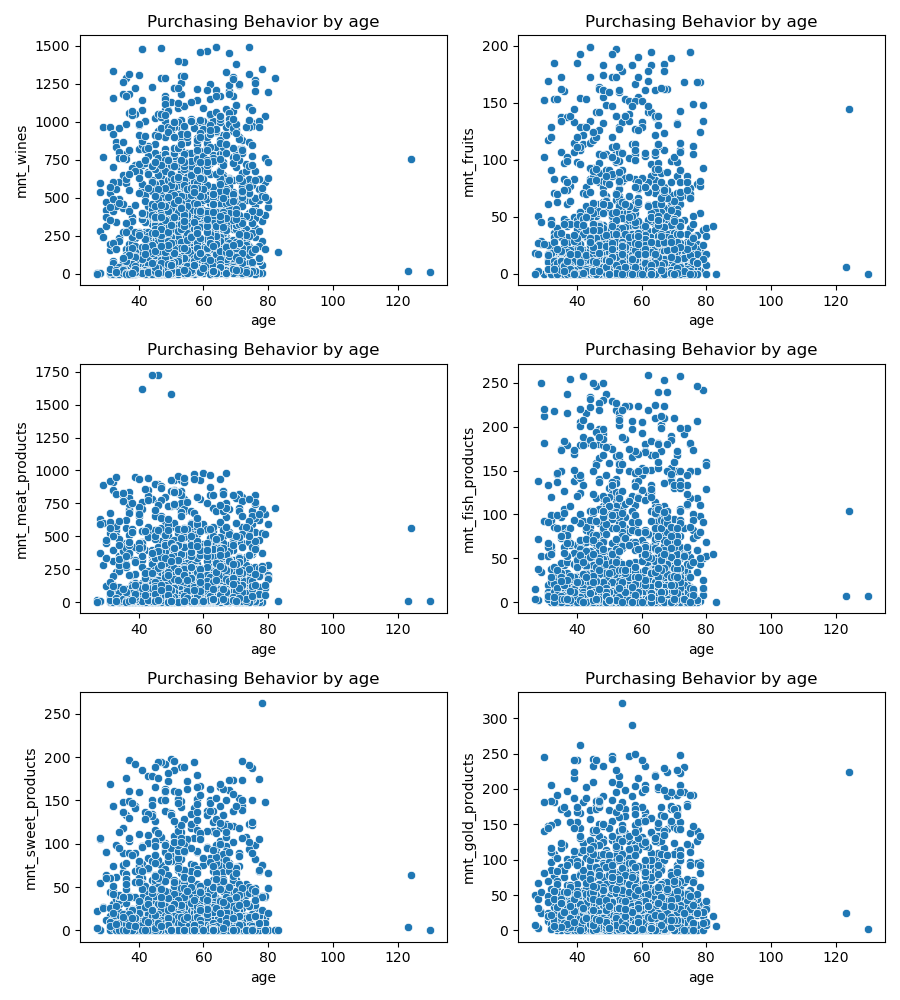

In [84]:
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
plot = 0
fig = plt.figure(figsize=(9,10))
# looping through the length of the amounts columns list
for i in range(len(amounts_list)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(3, 2, plot)
    # plotting amounts purchased vs. income
    sns.scatterplot(y= marketing_data[amounts_list[i]], x=marketing_data["age"])
    plt.title("Purchasing Behavior by age")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


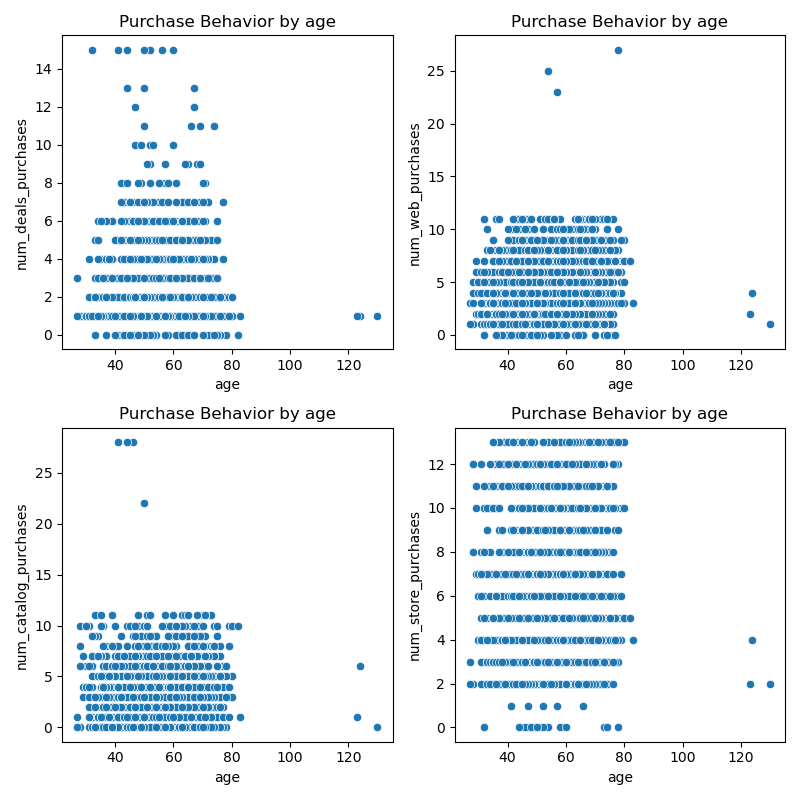

In [85]:
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.scatterplot(x=marketing_data["age"], y= marketing_data[num_purchases_cols[i]])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show();

In [87]:
age_plus_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]
# breaking up the age bins
bins = [18, 35, 50, 70, 150]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_plus_amounts['age_group'] = pd.cut(age_plus_amounts.age, bins=bins, labels=labels)
age_plus_amounts = age_plus_amounts.groupby('age_group').sum().reset_index()

<IPython.core.display.Javascript object>


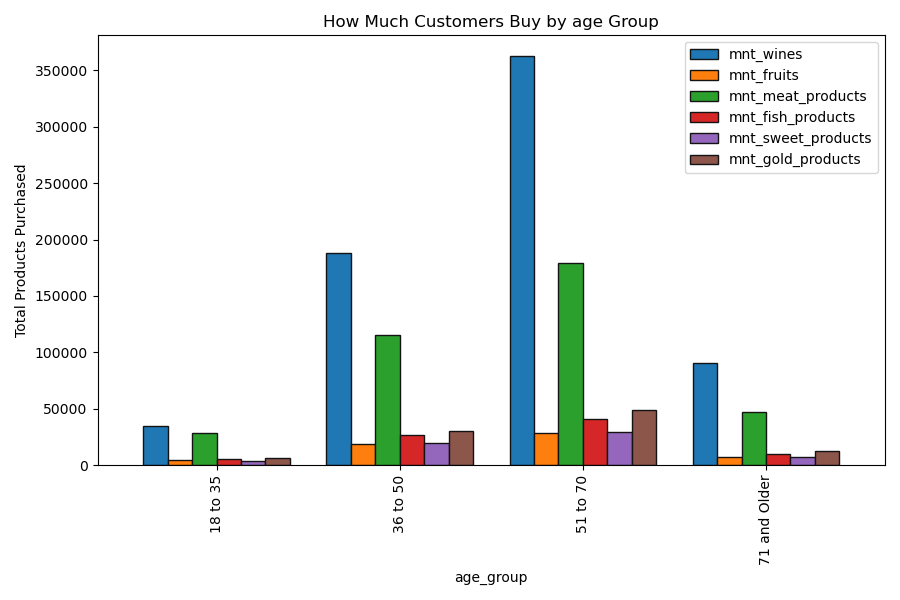

In [88]:
fig, ax = plt.subplots(figsize=(9, 6))

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_plus_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='#131313')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


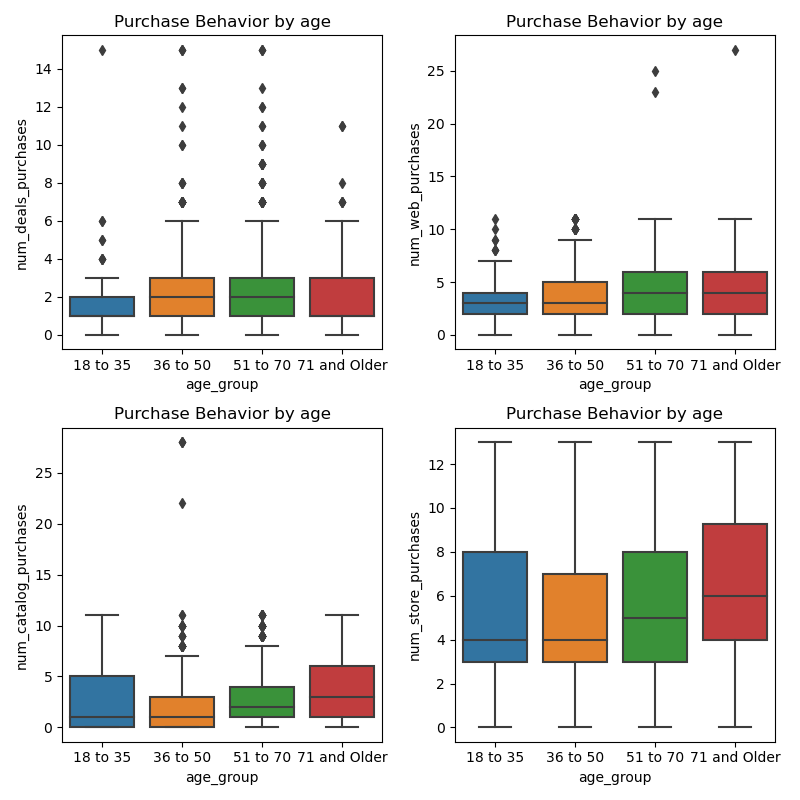

In [89]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of of num purchases vs. age
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], 
                order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age")

plt.tight_layout()
plt.show()
